In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

import path_utils
path_utils.add_path_to_sys_path("../../src", mode="relative_to_cwd", frame=inspect.currentframe())
import hypersim
import transforms

dict_keys(['render_entity_id', 'semantic', 'color', 'diffuse_reflectance', 'color_tonemap'])
torch.Size([1, 768, 1024]) torch.int16
torch.Size([1, 768, 1024]) torch.int16
torch.Size([3, 768, 1024]) torch.float16
torch.Size([3, 768, 1024]) torch.float16
torch.Size([3, 768, 1024]) torch.float32


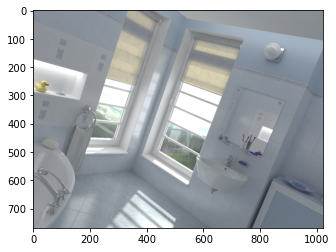

In [3]:
# You need to download at least a few images from the Hypersim dataset, and the split CSV file, see [1,2]
# [1] https://github.com/apple/ml-hypersim/tree/master/contrib/99991
# [2] https://raw.githubusercontent.com/apple/ml-hypersim/master/evermotion_dataset/analysis/metadata_images_split_scene_v1.csv

data_dir   = "/Users/mroberts/Downloads/hypersim_download"
split_file = "/Users/mroberts/Downloads/metadata_images_split_scene_v1.csv"
split      = "train"

# # include all modalities in the HypersimDataset object
# modalities = "all"

# only load specified modalities in the HypersimDataset object
modalities = ["render_entity_id", "semantic", "color", "diffuse_reflectance"]

# perform tone-mapping
# transpose channels and convert to PyTorch tensor
transform = torchvision.transforms.Compose([
    hypersim.ToneMap("color"),
    # transforms.SingleModalityTransform("semantic", transforms.NYU40ToNYU13()),
    transforms.AllModalitiesTransform(torchvision.transforms.ToTensor())
])

# can explicitly specify the number of items in the HypersimDataset object (useful for debugging)
num_items = 10

# # include all items in the HypersimDataset object
# num_items = None

dataset = hypersim.HypersimDataset(
    data_dir=data_dir,
    split_file=split_file,
    split=split,
    modalities=modalities,
    transform=transform,
    num_items=num_items)

item = dataset[0]

print(item.keys())
print(item["render_entity_id"].shape,    item["render_entity_id"].dtype)
print(item["semantic"].shape,            item["semantic"].dtype)
print(item["color"].shape,               item["color"].dtype)
print(item["diffuse_reflectance"].shape, item["diffuse_reflectance"].dtype)
print(item["color_tonemap"].shape,       item["color_tonemap"].dtype)

plt.imshow(np.array(item["color_tonemap"]).transpose([1,2,0]).astype(np.float32).squeeze());

In [4]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False)

In [5]:
batch = next(iter(dataloader))
print(batch.keys())
print(batch["render_entity_id"].shape,    batch["render_entity_id"].dtype)
print(batch["semantic"].shape,            batch["semantic"].dtype)
print(batch["color"].shape,               batch["color"].dtype)
print(batch["diffuse_reflectance"].shape, batch["diffuse_reflectance"].dtype)
print(batch["color_tonemap"].shape,       batch["color_tonemap"].dtype)

dict_keys(['render_entity_id', 'semantic', 'color', 'diffuse_reflectance', 'color_tonemap'])
torch.Size([2, 1, 768, 1024]) torch.int16
torch.Size([2, 1, 768, 1024]) torch.int16
torch.Size([2, 3, 768, 1024]) torch.float16
torch.Size([2, 3, 768, 1024]) torch.float16
torch.Size([2, 3, 768, 1024]) torch.float32


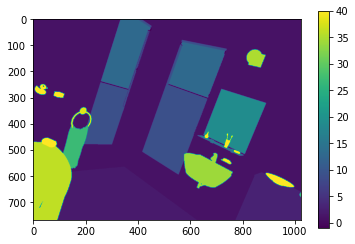

In [6]:
item_semantic = batch["semantic"][0]
plt.imshow(np.array(item_semantic).squeeze());
plt.colorbar();

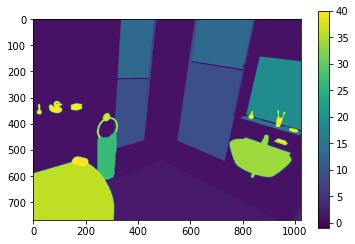

In [7]:
item_semantic = batch["semantic"][1]
plt.imshow(np.array(item_semantic).squeeze());
plt.colorbar();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([2, 3, 768, 1024])
(3, 768, 1024)
0.006523
9.77


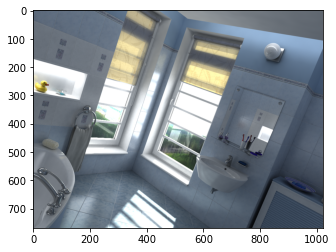

In [8]:
print(batch["color"].shape)

color = np.array(batch["color"][0])
print(color.shape)
print(np.min(color))
print(np.max(color))

plt.imshow(np.array(color).transpose([1,2,0]).astype(np.float32).squeeze());

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([2, 3, 768, 1024])
(3, 768, 1024)
0.00516
33.7


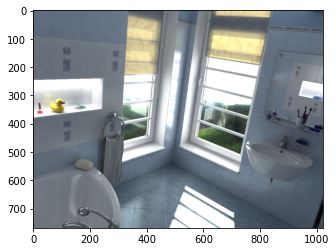

In [9]:
print(batch["color"].shape)

color = np.array(batch["color"][1])
print(color.shape)
print(np.min(color))
print(np.max(color))

plt.imshow(np.array(color).transpose([1,2,0]).astype(np.float32).squeeze());

torch.Size([2, 3, 768, 1024])
(3, 768, 1024)
0.08409723
1.0


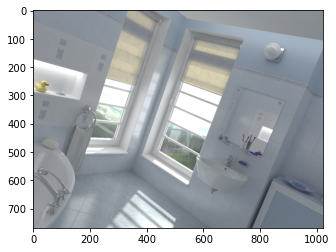

In [10]:
print(batch["color_tonemap"].shape)

color_tonemap = np.array(batch["color_tonemap"][0])
print(color_tonemap.shape)
print(np.min(color_tonemap))
print(np.max(color_tonemap))

plt.imshow(np.array(color_tonemap).transpose([1,2,0]).astype(np.float32).squeeze());

torch.Size([2, 3, 768, 1024])
(3, 768, 1024)
0.07175522
1.0


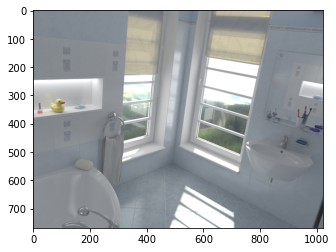

In [11]:
print(batch["color_tonemap"].shape)

color_tonemap = np.array(batch["color_tonemap"][1])
print(color_tonemap.shape)
print(np.min(color_tonemap))
print(np.max(color_tonemap))

plt.imshow(np.array(color_tonemap).transpose([1,2,0]).astype(np.float32).squeeze());